In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Importing and analysing data

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
data.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Separating data

In [6]:
X = data.drop(labels=['MEDV'], axis=1).values
y = data['MEDV']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
y_test.describe()

count    102.000000
mean      21.488235
std        8.605804
min        5.000000
25%       17.125000
50%       20.150000
75%       24.075000
max       50.000000
Name: MEDV, dtype: float64

In [9]:
results_train = []
results_test = []
names = []

# Testing Classifiers

## Linear

In [10]:
from sklearn.linear_model import LinearRegression
names.append("Linear")

In [11]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
RMSE_test = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE_train = sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(X_train)))
results_test.append(RMSE_test)
results_train.append(RMSE_train)
print("RMSE test: ", RMSE_test)
print("RMSE train:", RMSE_train)

RMSE test:  4.928602182665344
RMSE train: 4.6520331848801675


## Ridge

In [14]:
from sklearn.linear_model import Ridge
names.append("Ridge")

In [15]:
clf = Ridge(alpha=1.0, random_state=42)
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
RMSE_test = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE_train = sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(X_train)))
results_test.append(RMSE_test)
results_train.append(RMSE_train)
print("RMSE test: ", RMSE_test)
print("RMSE train:", RMSE_train)

RMSE test:  4.947442897872461
RMSE train: 4.671629083261626


## SVR

In [18]:
from sklearn.svm import SVR
names.append("SVR")

In [19]:
clf = SVR(kernel='poly',degree=2,gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.2, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
RMSE_test = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE_train = sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(X_train)))
results_test.append(RMSE_test)
results_train.append(RMSE_train)
print("RMSE test: ", RMSE_test)
print("RMSE train:", RMSE_train)

RMSE test:  4.592777025260236
RMSE train: 4.797407217467415


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
names.append("Decision Tree")

In [23]:
clf = DecisionTreeRegressor(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [24]:
y_pred = clf.predict(X_test)

In [25]:
RMSE_test = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE_train = sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(X_train)))
results_test.append(RMSE_test)
results_train.append(RMSE_train)
print("RMSE test: ", RMSE_test)
print("RMSE train:", RMSE_train)

RMSE test:  4.094699885295929
RMSE train: 3.9876840415639316


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
names.append("Random Forest")

In [27]:
clf = RandomForestRegressor(max_depth=3, random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
RMSE_test = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE_train = sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(X_train)))
results_test.append(RMSE_test)
results_train.append(RMSE_train)
print("RMSE test: ", RMSE_test)
print("RMSE train:", RMSE_train)

RMSE test:  3.5627217175979085
RMSE train: 3.3844937821342262


# Comparing the classifiers visualy

In [30]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(names))
    plt.bar(index, results_test, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Classifier', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.xticks(index, names, fontsize=15, rotation=30)
    plt.yticks(np.arange(0, 5.25, 0.25))
    plt.title('Comparing classifiers in Boston Housing by RMSE(Lower is better)')
    plt.show()

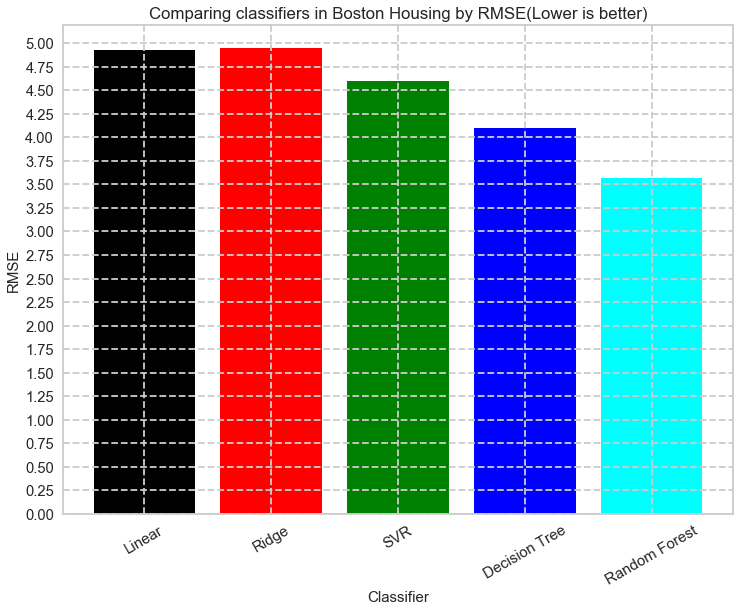

In [31]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plot_bar_x()

# Saving the classifier

In [32]:
from sklearn.externals import joblib
joblib.dump(clf, 'classifier.pkl')

['classifier.pkl']